# 机器学习课程设计竞赛

In [1]:
!ls /ilab/datasets/local/cat-dog

test  training


In [2]:
!ls /ilab/datasets/local/cat-dog/training

cats  dogs


In [3]:
!ls -al /ilab/datasets/local/cat-dog/training/cats/*.jpg | wc -l

4000


In [4]:
!ls -al /ilab/datasets/local/cat-dog/training/dogs/*.jpg | wc -l

4005


In [5]:
!ls -al /ilab/datasets/local/cat-dog/test/*.jpg | wc -l

2023


In [6]:
!ls -al /ilab/datasets/local/cat-dog/test | head

total 49308
drwxr-xr-x. 2 nobody nogroup 53248 Dec 26 12:04 .
drwxr-xr-x. 4 nobody nogroup    46 Dec 26 12:04 ..
-rw-r--r--. 1 nobody nogroup 42594 Dec 26 12:03 1000.jpg
-rw-r--r--. 1 nobody nogroup  7711 Dec 26 12:03 1001.jpg
-rw-r--r--. 1 nobody nogroup  7576 Dec 26 12:03 1002.jpg
-rw-r--r--. 1 nobody nogroup 30153 Dec 26 12:03 1003.jpg
-rw-r--r--. 1 nobody nogroup 17685 Dec 26 12:03 1004.jpg
-rw-r--r--. 1 nobody nogroup 29497 Dec 26 12:03 1005.jpg
-rw-r--r--. 1 nobody nogroup 14960 Dec 26 12:03 1006.jpg
ls: write error: Broken pipe


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np


import tensorflow
import torch
import torchvision
import cv2

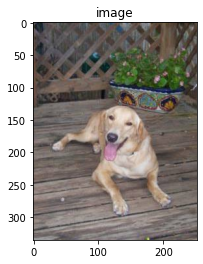

In [8]:
# 用opencv读取图像并显示
img = cv2.imread('/ilab/datasets/local/cat-dog/test/1.jpg')

plt.imshow(img[:,:,::-1])
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像标题
plt.show()

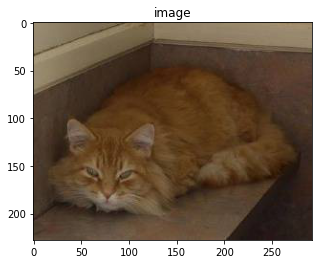

In [9]:
# 用PIL读取图像并显示
img = Image.open('/ilab/datasets/local/cat-dog/test/2.jpg', 'r')

plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像标题
plt.show()

In [10]:
# 图像缩放
out = img.resize((128, 128))

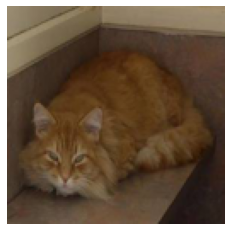

In [11]:
plt.imshow(out)
plt.axis('off') 
plt.show()

In [12]:
# 转为numpy格式数据
im = np.array(out)

In [13]:
im.shape

(128, 128, 3)

In [14]:
# 写出你的算法

In [15]:
with open('/home/ilab/submission','w') as f:
    f.write('label\n')
    for i in range(2023):
        f.write('cat\n')

# resnet 50

In [1]:
pip install keras

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 269 kB 306 kB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=8e9f2d09101f53d2ef5a1ce35b13ad5210d26504afdd013ce59b812081fdd69c
  Stored in directory: /tmp/pip-ephem-wheel-cache-0cnj_ydt/wheels/9f/15/eb/414f376bfffab7727f7e2ce2b1845ebe5f162fcc01a3720e85
Successfully built pyyaml
Note: you may need to restart the kernel to use updated packages.


In [2]:
!mkdir test
!cp -r /ilab/datasets/local/cat-dog/* /home/jovyan/test
!rm -rf /home/jovyan/test/training

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, optimizers, models
from keras.applications.resnet50 import ResNet50

In [4]:
train_dir = os.path.join('/ilab/datasets/local/cat-dog/training')
test_dir = os.path.join('/home/jovyan/test')

In [5]:
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model = models.Sequential()
model.add(resnet50)
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
resnet50.trainable = False
#冻结一个层意味着将其排除在训练之外，即其权重将永远不会更新

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

94773248/94765736 [==============================] - 147s 2us/step


In [6]:
batch_size = 64

train_datagen = ImageDataGenerator
(
    rotation_range=45,#随机旋转
    width_shift_range=0.2,#是图像在水平上平移的范围
    height_shift_range=0.2,#垂直方向上平移的范围
    shear_range=0.2,#随机错切变换的角度
    zoom_range=0.2,#随机缩放的范围
    horizontal_flip=True#随机将图像水平翻转
)
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory
(
        train_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='binary'
)
test_generator = test_datagen.flow_from_directory
(
    test_dir,
    target_size=(128, 128),
    batch_size=64,
    shuffle=False#不打乱顺序
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 1 classes.


In [7]:
history = model.fit
(
      train_generator,
      steps_per_epoch=train_generator.samples//batch_size,
      epochs=5
)

Epoch 1/5
125/125 [==============================] - 1074s 9s/step - loss: 0.7004 - acc: 0.7520
Epoch 2/5
125/125 [==============================] - 1071s 9s/step - loss: 0.3798 - acc: 0.8552
Epoch 3/5
125/125 [==============================] - 1071s 9s/step - loss: 0.3200 - acc: 0.8790
Epoch 4/5
125/125 [==============================] - 1070s 9s/step - loss: 0.3004 - acc: 0.8870
Epoch 5/5
125/125 [==============================] - 1070s 9s/step - loss: 0.2999 - acc: 0.8859


In [8]:
pred = model.predict_generator(test_generator, verbose=1)
ans = []
pred = pred.astype('float')
for i in range(len(pred)):
    if pred[i]>=0.5:
        ans.append('dog')
    else:
        ans.append('cat')

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


32/32 [==============================] - 267s 8s/step


In [10]:
cd test/test

/home/jovyan/test/test


In [ ]:
name_list = []
for name in os.listdir():
    name_list.append(int(name[:-4]))

In [12]:
dic = dict(map(lambda x,y:[x,y],name_list,ans))
dic = dict(sorted(dic.items(), key=lambda dic:dic[0],reverse = False))

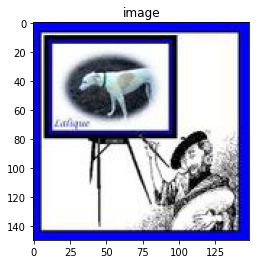

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np


import tensorflow
import torch
import torchvision
import cv2
img = Image.open('/ilab/datasets/local/cat-dog/test/10.jpg', 'r')

plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像标题
plt.show()

In [24]:
print(dic[1])

dog


In [ ]:
with open('/home/ilab/submission','w') as f:
    f.write('label\n')
    for i in range(2023):
        print(dic[i+1])
        f.write(dic[i+1] + '\n')

# resnet50 归一化 动态调整学习率(epochs较小的时候好像没啥用)

In [1]:
pip install keras

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 269 kB 2.6 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=c8ec5c850baf0538b92c87fac13da78add9b5a04ca1ff57b6806b00c9f770668
  Stored in directory: /tmp/pip-ephem-wheel-cache-ss1nxjij/wheels/9f/15/eb/414f376bfffab7727f7e2ce2b1845ebe5f162fcc01a3720e85
Successfully built pyyaml
Note: you may need to restart the kernel to use updated packages.


In [6]:
!mkdir test
!cp -r /ilab/datasets/local/cat-dog/* /home/jovyan/test
!rm -rf /home/jovyan/test/training

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, optimizers, models
from keras.applications.resnet50 import ResNet50,preprocess_input

In [3]:
train_dir = os.path.join('/ilab/datasets/local/cat-dog/training')
test_dir = os.path.join('/home/jovyan/test')

In [4]:
from keras.callbacks import ReduceLROnPlateau
Reduce=ReduceLROnPlateau(
    monitor ='acc',#监测的值，可以是accuracy，val_loss,val_accuracy
    factor=0.1,#缩放学习率的值，学习率将以lr = lr*factor的形式被减少
    patience=2,#当patience个epoch过去而模型性能不提升时，学习率减少的动作会被触发
    verbose=1,
    mode='auto',#‘auto’，‘min’，‘max’之一 默认‘auto’就行
    cooldown=0,#学习率减少后，会经过cooldown个epoch才重新进行正常操作
    min_lr=0 #学习率最小值，能缩小到的下限
)

In [5]:
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

model = models.Sequential()
model.add(resnet50)
#model.add(GlobalAveragePooling2D())
model.add(layers.Flatten())
#model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

resnet50.trainable = False
#冻结一个层意味着将其排除在训练之外，即其权重将永远不会更新
optimizer = optimizers.RMSprop(lr=1e-4)

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr
lr_metric = get_lr_metric(optimizer)
model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc',lr_metric])

94773248/94765736 [==============================] - 25s 0us/step


In [7]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64

train_datagen = ImageDataGenerator(
    rotation_range=45,#随机旋转
    width_shift_range=0.2,#是图像在水平上平移的范围
    height_shift_range=0.2,#垂直方向上平移的范围
    shear_range=0.2,#随机错切变换的角度
    zoom_range=0.2,#随机缩放的范围
    horizontal_flip=True,#随机将图像水平翻转
    preprocessing_function=preprocess_input#归一化
)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=64,
    shuffle=False
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 1 classes.


In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//batch_size,
      epochs = 6,
      callbacks=[Reduce]
)

Epoch 1/6
125/125 [==============================] - 940s 7s/step - loss: 0.6779 - acc: 0.7734 - lr: 1.0000e-04
Epoch 2/6
125/125 [==============================] - 937s 7s/step - loss: 0.2330 - acc: 0.9189 - lr: 1.0000e-04
Epoch 3/6
125/125 [==============================] - 938s 7s/step - loss: 0.2192 - acc: 0.9243 - lr: 1.0000e-04
Epoch 4/6
125/125 [==============================] - 936s 7s/step - loss: 0.1966 - acc: 0.9355 - lr: 1.0000e-04
Epoch 5/6
125/125 [==============================] - 935s 7s/step - loss: 0.2056 - acc: 0.9295 - lr: 1.0000e-04
Epoch 6/6
125/125 [==============================] - 935s 7s/step - loss: 0.1766 - acc: 0.9388 - lr: 1.0000e-04


In [9]:
cd test/test

/home/jovyan/test/test


In [11]:
pred = model.predict_generator(test_generator, verbose=1)
ans = []
pred = pred.astype('float')
for i in range(len(pred)):
    if pred[i]>=0.5:
        ans.append('dog')
    else:
        ans.append('cat')
name_list = []
for name in os.listdir():
    name_list.append(int(name[:-4]))
dic = dict(map(lambda x,y:[x,y],name_list,ans))
dic = dict(sorted(dic.items(), key=lambda dic:dic[0],reverse = False))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


32/32 [==============================] - 232s 7s/step


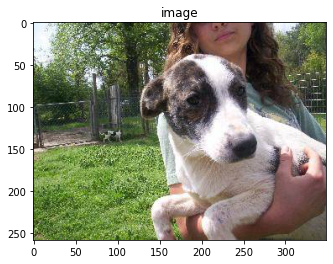

dog


In [53]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

i=40
import tensorflow
import torch
import torchvision
import cv2
img = Image.open('/ilab/datasets/local/cat-dog/test/' + str(i) + '.jpg', 'r')

plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像标题
plt.show()
print(dic[i])

In [ ]:
with open('/home/ilab/submission','w') as f:
    f.write('label\n')
    for i in range(2023):
        print(dic[i+1])
        f.write(dic[i+1] + '\n')

# resnet50 图片大小216*216

In [1]:
pip install keras

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 269 kB 2.2 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=a2290afd91ba3c8d820a58f3da83f835a4daebc8cc93b27d40a0f44958308d56
  Stored in directory: /tmp/pip-ephem-wheel-cache-eiw5wfm9/wheels/9f/15/eb/414f376bfffab7727f7e2ce2b1845ebe5f162fcc01a3720e85
Successfully built pyyaml
Note: you may need to restart the kernel to use updated packages.


In [6]:
!mkdir test
!cp -r /ilab/datasets/local/cat-dog/* /home/jovyan/test
!rm -rf /home/jovyan/test/training

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, optimizers, models
from keras.applications.resnet50 import ResNet50,preprocess_input

In [3]:
train_dir = os.path.join('/ilab/datasets/local/cat-dog/training')
test_dir = os.path.join('/home/jovyan/test')

In [4]:
from keras.callbacks import ReduceLROnPlateau
Reduce=ReduceLROnPlateau(
    monitor ='acc',#监测的值，可以是accuracy，val_loss,val_accuracy
    factor=0.1,#缩放学习率的值，学习率将以lr = lr*factor的形式被减少
    patience=2,#当patience个epoch过去而模型性能不提升时，学习率减少的动作会被触发
    verbose=1,
    mode='auto',#‘auto’，‘min’，‘max’之一 默认‘auto’就行
    cooldown=0,#学习率减少后，会经过cooldown个epoch才重新进行正常操作
    min_lr=0 #学习率最小值，能缩小到的下限
)

In [5]:
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(216, 216, 3))

model = models.Sequential()
model.add(resnet50)
#model.add(GlobalAveragePooling2D())
model.add(layers.Flatten())
#model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

resnet50.trainable = False
#冻结一个层意味着将其排除在训练之外，即其权重将永远不会更新
optimizer = optimizers.RMSprop(lr=1e-4)

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr
lr_metric = get_lr_metric(optimizer)
model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc',lr_metric])

94773248/94765736 [==============================] - 20s 0us/step


In [7]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64

train_datagen = ImageDataGenerator(
    rotation_range=45,#随机旋转
    width_shift_range=0.2,#是图像在水平上平移的范围
    height_shift_range=0.2,#垂直方向上平移的范围
    shear_range=0.2,#随机错切变换的角度
    zoom_range=0.2,#随机缩放的范围
    horizontal_flip=True,#随机将图像水平翻转
    preprocessing_function=preprocess_input#归一化
)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(216, 216),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(216, 216),
    batch_size=64,
    shuffle=False
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 1 classes.


In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//batch_size,
      epochs = 2,
      callbacks=[Reduce]
)

Epoch 1/2
125/125 [==============================] - 3026s 24s/step - loss: 0.3720 - acc: 0.8845 - lr: 1.0000e-04
Epoch 2/2
125/125 [==============================] - 3027s 24s/step - loss: 0.1040 - acc: 0.9682 - lr: 1.0000e-04


In [9]:
cd test/test

/home/jovyan/test/test


In [10]:
pred = model.predict_generator(test_generator, verbose=1)
ans = []
pred = pred.astype('float')
for i in range(len(pred)):
    if pred[i]>=0.5:
        ans.append('dog')
    else:
        ans.append('cat')
name_list = []
for name in os.listdir():
    name_list.append(int(name[:-4]))
dic = dict(map(lambda x,y:[x,y],name_list,ans))
dic = dict(sorted(dic.items(), key=lambda dic:dic[0],reverse = False))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


32/32 [==============================] - 755s 24s/step


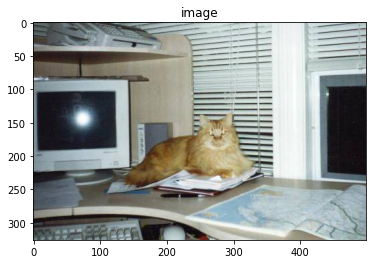

cat


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

i=18
import tensorflow
import torch
import torchvision
import cv2
img = Image.open('/ilab/datasets/local/cat-dog/test/' + str(i) + '.jpg', 'r')

plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像标题
plt.show()
print(dic[i])

In [ ]:
with open('/home/ilab/submission','w') as f:
    f.write('label\n')
    for i in range(2023):
        print(dic[i+1])
        f.write(dic[i+1] + '\n')

# resnet50 并将图片大小调整为300*300

In [ ]:
pip install keras

In [7]:
!mkdir test
!cp -r /ilab/datasets/local/cat-dog/* /home/jovyan/test
!rm -rf /home/jovyan/test/training

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, optimizers, models
from keras.applications.resnet50 import ResNet50,preprocess_input

In [4]:
train_dir = os.path.join('/ilab/datasets/local/cat-dog/training')
test_dir = os.path.join('/home/jovyan/test')

In [5]:
from keras.callbacks import ReduceLROnPlateau
Reduce=ReduceLROnPlateau(
    monitor ='acc',#监测的值，可以是accuracy，val_loss,val_accuracy
    factor=0.1,#缩放学习率的值，学习率将以lr = lr*factor的形式被减少
    patience=2,#当patience个epoch过去而模型性能不提升时，学习率减少的动作会被触发
    verbose=1,
    mode='auto',#‘auto’，‘min’，‘max’之一 默认‘auto’就行
    cooldown=0,#学习率减少后，会经过cooldown个epoch才重新进行正常操作
    min_lr=0 #学习率最小值，能缩小到的下限
)

In [6]:
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

model = models.Sequential()
model.add(resnet50)
#model.add(GlobalAveragePooling2D())
model.add(layers.Flatten())
#model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

resnet50.trainable = False
#冻结一个层意味着将其排除在训练之外，即其权重将永远不会更新
optimizer = optimizers.RMSprop(lr=1e-4)

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr
lr_metric = get_lr_metric(optimizer)
model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics=['acc',lr_metric])

94773248/94765736 [==============================] - 22s 0us/step


In [8]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 64

train_datagen = ImageDataGenerator(
    rotation_range=45,#随机旋转
    width_shift_range=0.2,#是图像在水平上平移的范围
    height_shift_range=0.2,#垂直方向上平移的范围
    shear_range=0.2,#随机错切变换的角度
    zoom_range=0.2,#随机缩放的范围
    horizontal_flip=True,#随机将图像水平翻转
    preprocessing_function=preprocess_input#归一化
)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=64,
    shuffle=False
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 1 classes.


In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//batch_size,
      epochs = 1,
      callbacks=[Reduce]
)

125/125 [==============================] - 5824s 47s/step - loss: 0.4335 - acc: 0.8789 - lr: 1.0000e-04


In [10]:
cd test/test

/home/jovyan/test/test


In [ ]:
pred = model.predict_generator(test_generator, verbose=1)
ans = []
pred = pred.astype('float')
for i in range(len(pred)):
    if pred[i]>=0.5:
        ans.append('dog')
    else:
        ans.append('cat')
name_list = []
for name in os.listdir():
    name_list.append(int(name[:-4]))
dic = dict(map(lambda x,y:[x,y],name_list,ans))
dic = dict(sorted(dic.items(), key=lambda dic:dic[0],reverse = False))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


 9/32 [=======>......................] - ETA: 17:37

In [11]:
print(dic)

{1: 'cat', 2: 'cat', 3: 'dog', 4: 'dog', 5: 'cat', 6: 'dog', 7: 'cat', 8: 'cat', 9: 'dog', 10: 'dog', 11: 'cat', 12: 'cat', 13: 'cat', 14: 'cat', 15: 'cat', 16: 'cat', 17: 'cat', 18: 'dog', 19: 'dog', 20: 'cat', 21: 'dog', 22: 'cat', 23: 'cat', 24: 'cat', 25: 'dog', 26: 'dog', 27: 'dog', 28: 'dog', 29: 'cat', 30: 'cat', 31: 'dog', 32: 'dog', 33: 'cat', 34: 'dog', 35: 'cat', 36: 'dog', 37: 'cat', 38: 'cat', 39: 'cat', 40: 'dog', 41: 'dog', 42: 'dog', 43: 'cat', 44: 'dog', 45: 'cat', 46: 'cat', 47: 'dog', 48: 'cat', 49: 'dog', 50: 'cat', 51: 'dog', 52: 'cat', 53: 'dog', 54: 'cat', 55: 'cat', 56: 'dog', 57: 'dog', 58: 'cat', 59: 'dog', 60: 'dog', 61: 'cat', 62: 'cat', 63: 'dog', 64: 'dog', 65: 'cat', 66: 'cat', 67: 'dog', 68: 'cat', 69: 'dog', 70: 'cat', 71: 'cat', 72: 'cat', 73: 'dog', 74: 'cat', 75: 'dog', 76: 'cat', 77: 'dog', 78: 'dog', 79: 'cat', 80: 'dog', 81: 'dog', 82: 'dog', 83: 'cat', 84: 'cat', 85: 'cat', 86: 'dog', 87: 'dog', 88: 'cat', 89: 'cat', 90: 'cat', 91: 'dog', 92: 'ca

In [ ]:
with open('/home/ilab/submission','w') as f:
    f.write('label\n')
    for i in range(2023):
        f.write(dic[i+1] + '\n')

# resnet152 dropout层 300*300 epoch = 20

In [1]:
pip install keras

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 269 kB 1.2 MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=71c334c6c5713357fb78256c9d7ef02256a68a97b93bf19fd25218f34fa89645
  Stored in directory: /tmp/pip-ephem-wheel-cache-xl8br_ry/wheels/9f/15/eb/414f376bfffab7727f7e2ce2b1845ebe5f162fcc01a3720e85
Successfully built pyyaml
Note: you may need to restart the kernel to use updated packages.


In [2]:
!mkdir test
!cp -r /ilab/datasets/local/cat-dog/* /home/jovyan/test
!rm -rf /home/jovyan/test/training

In [3]:
import os
import numpy as np
from keras import layers, optimizers, models
from keras.applications.resnet import ResNet152, preprocess_input
from keras.layers import *    
from keras.models import Model
from keras.models import load_model

In [4]:
test_dir = os.path.join('/home/jovyan/test')

In [5]:
optimizer = optimizers.RMSprop(lr=1e-4)
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr
lr_metric = get_lr_metric(optimizer)

In [6]:
!wget https://cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com/cat-dog-resnet152-epoch20.h5
model = load_model('cat-dog-resnet152-epoch20.h5',custom_objects={'lr': lr_metric})

--2021-01-09 07:14:24--  https://cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com/cat-dog-resnet152-epoch20.h5
Resolving cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com (cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com)... 118.31.219.203
Connecting to cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com (cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com)|118.31.219.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236037664 (225M) [application/octet-stream]
Saving to: ‘cat-dog-resnet152-epoch20.h5’

cat-dog-resnet152-e 100%[===================>] 225.10M  4.44MB/s    in 53s     

2021-01-09 07:15:18 (4.25 MB/s) - ‘cat-dog-resnet152-epoch20.h5’ saved [236037664/236037664]



In [7]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 64
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=64,
    shuffle=False
)

Found 2023 images belonging to 1 classes.


In [8]:
cd test/test

/home/jovyan/test/test


In [9]:
pred = model.predict(test_generator, verbose=1)
ans = []
pred = pred.astype('float')
for i in range(len(pred)):
    if pred[i]>=0.5:
        ans.append('dog')
    else:
        ans.append('cat')
name_list = []
for name in os.listdir():
    name_list.append(int(name[:-4]))
dic = dict(map(lambda x,y:[x,y],name_list,ans))
dic = dict(sorted(dic.items(), key=lambda dic:dic[0],reverse = False))

32/32 [==============================] - 3462s 108s/step


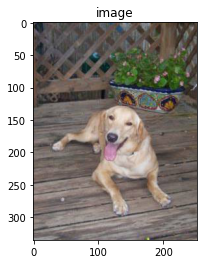

dog


In [73]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

i=1
import tensorflow
import torch
import torchvision
import cv2
img = Image.open('/ilab/datasets/local/cat-dog/test/' + str(i) + '.jpg', 'r')

plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像标题
plt.show()
print(dic[i])

In [ ]:
with open('/home/ilab/submission','w') as f:
    f.write('label\n')
    for i in range(2023):
        print(dic[i+1])
        f.write(dic[i+1] + '\n')

# resnet152  加入密集全连接层 dropout层 300*300 epoch = 12

In [1]:
pip install keras

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 269 kB 671 kB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=08dd0dc4c0062e05a79a7ccc88f9d759b3a4a5996d63296a7a08a9697811f41f
  Stored in directory: /tmp/pip-ephem-wheel-cache-lg1xkwat/wheels/9f/15/eb/414f376bfffab7727f7e2ce2b1845ebe5f162fcc01a3720e85
Successfully built pyyaml
Note: you may need to restart the kernel to use updated packages.


In [2]:
!mkdir test
!cp -r /ilab/datasets/local/cat-dog/* /home/jovyan/test
!rm -rf /home/jovyan/test/training

In [3]:
import os
import numpy as np
from keras import layers, optimizers, models
from keras.applications.resnet import ResNet152, preprocess_input
from keras.layers import *    
from keras.models import Model
from keras.models import load_model

In [4]:
test_dir = os.path.join('/home/jovyan/test')

In [5]:
optimizer = optimizers.RMSprop(lr=1e-4)
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr
lr_metric = get_lr_metric(optimizer)

In [6]:
!wget https://cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com/cat-dog-resnet152-epoch12.h5
model = load_model('cat-dog-resnet152-epoch12.h5',custom_objects={'lr': lr_metric})

--2021-01-11 06:05:10--  https://cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com/cat-dog-resnet152-epoch12.h5
Resolving cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com (cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com)... 118.31.219.209
Connecting to cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com (cat-dog-pdocw.oss-cn-hangzhou.aliyuncs.com)|118.31.219.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253349192 (242M) [application/octet-stream]
Saving to: ‘cat-dog-resnet152-epoch12.h5’

cat-dog-resnet152-e 100%[===================>] 241.61M  3.43MB/s    in 61s     

2021-01-11 06:06:11 (3.96 MB/s) - ‘cat-dog-resnet152-epoch12.h5’ saved [253349192/253349192]



In [7]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 64
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=64,
    shuffle=False
)

Found 2023 images belonging to 1 classes.


In [8]:
cd test/test

/home/jovyan/test/test


In [9]:
pred = model.predict(test_generator, verbose=1)
ans = []
pred = pred.astype('float')
for i in range(len(pred)):
    if pred[i]>=0.5:
        ans.append('dog')
    else:
        ans.append('cat')
name_list = []
for name in os.listdir():
    name_list.append(int(name[:-4]))
dic = dict(map(lambda x,y:[x,y],name_list,ans))
dic = dict(sorted(dic.items(), key=lambda dic:dic[0],reverse = False))

32/32 [==============================] - 3320s 104s/step


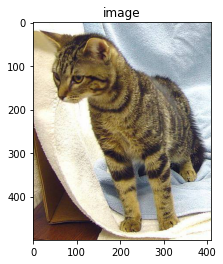

cat


In [74]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

i = 2023
import tensorflow
import torch
import torchvision
import cv2
img = Image.open('/ilab/datasets/local/cat-dog/test/' + str(i) + '.jpg', 'r')

plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.title('image') # 图像标题
plt.show()
print(dic[i])

In [40]:
with open('/home/ilab/submission','w') as f:
    f.write('label\n')
    for i in range(2023):
        print(dic[i+1])
        f.write(dic[i+1] + '\n')

dog
cat
dog
dog
cat
cat
cat
cat
dog
dog
cat
cat
cat
cat
cat
cat
cat
cat
dog
cat
dog
cat
cat
cat
dog
dog
dog
dog
cat
cat
dog
dog
cat
dog
cat
dog
cat
cat
cat
dog
dog
dog
cat
dog
cat
cat
dog
cat
dog
cat
dog
cat
dog
cat
cat
dog
dog
cat
dog
dog
cat
cat
dog
dog
cat
cat
dog
cat
dog
cat
cat
dog
dog
cat
dog
cat
dog
dog
cat
dog
dog
dog
cat
cat
cat
dog
dog
cat
cat
cat
dog
cat
cat
cat
cat
dog
dog
dog
cat
cat
dog
dog
dog
dog
dog
cat
cat
dog
dog
dog
cat
cat
cat
cat
dog
cat
cat
dog
cat
cat
cat
dog
dog
cat
dog
dog
cat
cat
dog
cat
cat
dog
dog
dog
cat
cat
cat
dog
cat
dog
dog
dog
cat
dog
dog
cat
dog
cat
dog
cat
dog
cat
cat
dog
cat
cat
dog
dog
cat
cat
cat
dog
cat
cat
cat
cat
cat
dog
cat
dog
cat
cat
cat
cat
cat
cat
cat
dog
dog
dog
dog
cat
dog
cat
dog
dog
dog
dog
dog
dog
dog
dog
cat
dog
cat
cat
cat
cat
dog
dog
cat
cat
dog
dog
cat
dog
cat
dog
cat
cat
cat
cat
cat
cat
cat
dog
dog
dog
dog
cat
cat
cat
dog
cat
cat
cat
cat
dog
cat
cat
cat
dog
cat
dog
cat
dog
dog
dog
dog
cat
dog
dog
cat
dog
cat
cat
dog
dog
cat
cat
